In [283]:
import pandas as pd
import re
import contractions

In [284]:
data = pd.read_csv("tweets.csv")
data[:5]

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [285]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [286]:
data.drop("id",axis=1)
# data

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,0,Finally a transparant silicon case ^^ Thanks t...
2,0,We love this! Would you go? #talk #makememorie...
3,0,I'm wired I know I'm George I was made that wa...
4,1,What amazing service! Apple won't even talk to...
...,...,...
7915,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,0,We would like to wish you an amazing day! Make...
7917,0,Helping my lovely 90 year old neighbor with he...
7918,0,Finally got my #smart #pocket #wifi stay conne...


In [287]:
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<AxesSubplot: >

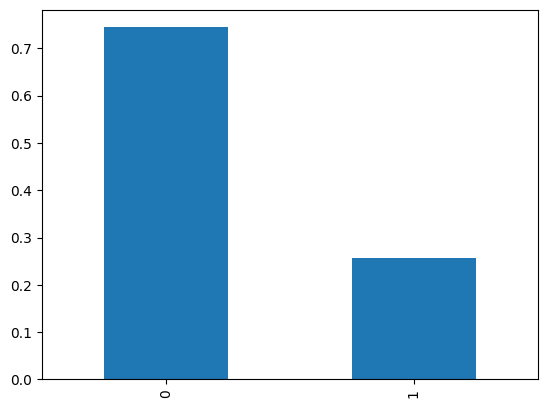

In [288]:
data['label'].value_counts(normalize=True).plot(kind='bar')

In [289]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [290]:
!pip install contractions
import contractions
def tweet_cleaner_without_stopword(text):
    newtext =re.sub(r"'s\b"," is",text)
    newtext = re.sub("#","",newtext)
    newtext = re.sub("@[A-Za-z0-9]+","",newtext)
    newtext = re.sub(r"http\S+","",newtext)
    # newtext = re.sub(r"https+","",newtext)
    newtext = contractions.fix(newtext)
    newtext = re.sub(r"[^a-zA-Z]"," ",newtext)
    newtext = newtext.lower().strip()
    
    # newtext = [for token in newtext.split() if token not in combine_stopwords]

    cleaned_text = ''
    for token in newtext.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token)+' '

    return cleaned_text    


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [291]:
data['tweets_without_stopwords'] = data['tweet'].apply(tweet_cleaner_without_stopword)
data

,id,label,tweet,tweets_without_stopwords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...
...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile son...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amazing day make ...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping my lovely year old neighbor with her i...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got my smart pocket wifi stay connecte...


In [292]:
import matplotlib.pyplot as plt

In [293]:
all_words = []
for t in data['tweets_without_stopwords']:
    all_words.extend(t.split())

len(set(all_words))

15981

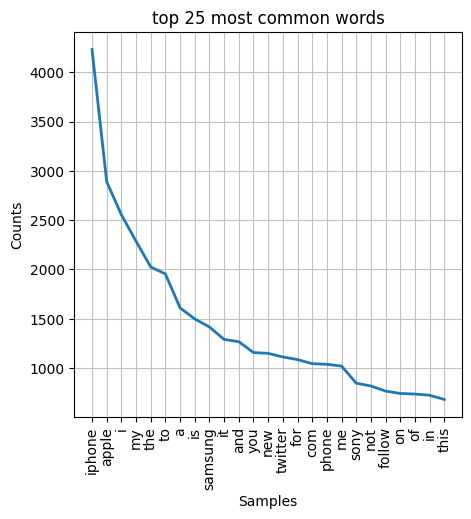

<AxesSubplot: title={'center': 'top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [294]:
freq_dist = nltk.FreqDist(all_words)
plt.figure(figsize=(5,5))
plt.title("top 25 most common words")

freq_dist.plot(25,cumulative=False)


In [295]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))
len(nltk_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [296]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
len(sklearn_stopwords)

318

In [297]:
combine_stopwords = nltk_stopwords.union(sklearn_stopwords)
len(combine_stopwords)

378

In [298]:
!pip install contractions
import contractions
def tweet_cleaner_with_stopword(text):
    newtext =re.sub(r"'s\b"," is",text)
    newtext = re.sub("#","",newtext)
    newtext = re.sub("@[A-Za-z0-9]+","",newtext)
    newtext = re.sub(r"http\S+","",newtext)
    # newtext = re.sub(r"https+","",newtext)
    newtext = contractions.fix(newtext)
    newtext = re.sub(r"[^a-zA-Z]"," ",newtext)
    newtext = newtext.lower().strip()
    
    newtext = [token for token in newtext.split() if token not in combine_stopwords]

    cleaned_text = ''
    for token in newtext:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token)+' '

    return cleaned_text    


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: C:\Users\lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [299]:
data['tweets_with_stopwords'] = data['tweet'].apply(tweet_cleaner_with_stopword)
data

,id,label,tweet,tweets_without_stopwords,tweets_with_stopwords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love talk makememories unplug relax iphone sma...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,amazing service apple talk question unless pay...
...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile son...,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amazing day make ...,like wish amazing day make minute count tl tod...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping my lovely year old neighbor with her i...,helping lovely year old neighbor ipad morning ...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got my smart pocket wifi stay connecte...,finally got smart pocket wifi stay connected a...


In [300]:
new_all_words = []
for t in data['tweets_with_stopwords']:
    new_all_words.extend(t.split())

len(set(new_all_words))

15738

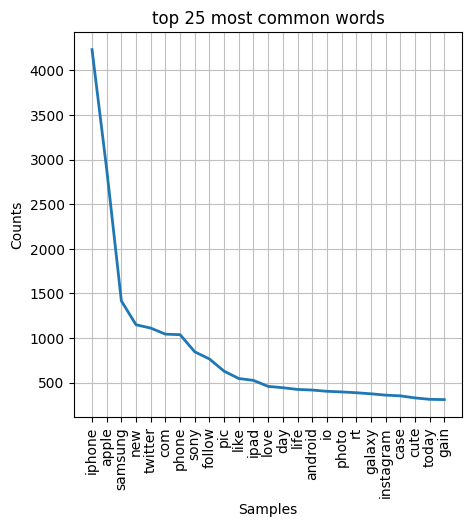

<AxesSubplot: title={'center': 'top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [301]:
freq_dist = nltk.FreqDist(new_all_words)
plt.figure(figsize=(5,5))
plt.title("top 25 most common words")

freq_dist.plot(25,cumulative=False)

In [302]:
domain_stopwords = ['phone','mobile','rt','com','follow','twitter']
final_stopwords = domain_stopwords+list(combine_stopwords)

In [303]:
def tweet_cleaner_with_stopword(text):
    newtext =re.sub(r"'s\b"," is",text)
    newtext = re.sub("#","",newtext)
    newtext = re.sub("@[A-Za-z0-9]+","",newtext)
    newtext = re.sub(r"http\S+","",newtext)
    # newtext = re.sub(r"https+","",newtext)
    newtext = contractions.fix(newtext)
    newtext = re.sub(r"[^a-zA-Z]"," ",newtext)
    newtext = newtext.lower().strip()
    
    newtext = [token for token in newtext.split() if token not in final_stopwords]

    cleaned_text = ''
    for token in newtext:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token)+' '

    return cleaned_text

In [304]:
data['tweets_with_stopwords'] = data['tweet'].apply(tweet_cleaner_with_stopword)
data

,id,label,tweet,tweets_without_stopwords,tweets_with_stopwords
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,fingerprint pregnancy test android apps beauti...,fingerprint pregnancy test android apps beauti...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,finally a transparant silicon case thanks to m...,finally transparant silicon case thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,we love this would you go talk makememories un...,love talk makememories unplug relax iphone sma...
3,4,0,I'm wired I know I'm George I was made that wa...,i am wired i know i am george i wa made that w...,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to...,what amazing service apple will not even talk ...,amazing service apple talk question unless pay...
...,...,...,...,...,...
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...,live out loud lol liveoutloud selfie smile son...,live loud lol liveoutloud selfie smile sony mu...
7916,7917,0,We would like to wish you an amazing day! Make...,we would like to wish you an amazing day make ...,like wish amazing day make minute count tl tod...
7917,7918,0,Helping my lovely 90 year old neighbor with he...,helping my lovely year old neighbor with her i...,helping lovely year old neighbor ipad morning ...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...,finally got my smart pocket wifi stay connecte...,finally got smart pocket wifi stay connected a...


In [305]:
new_all_words = []
for t in data['tweets_with_stopwords']:
    new_all_words.extend(t.split())

len(set(new_all_words))

15734

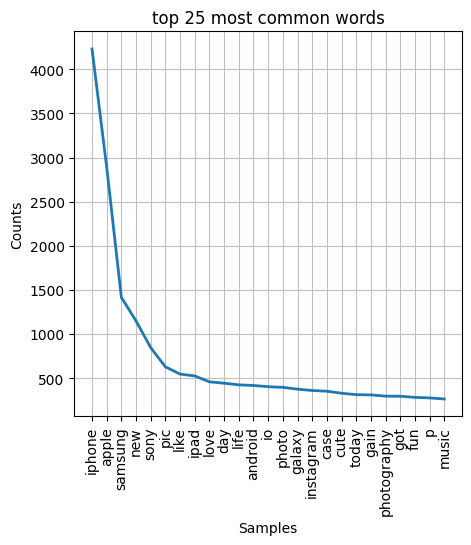

<AxesSubplot: title={'center': 'top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [306]:
freq_dist = nltk.FreqDist(new_all_words)
plt.figure(figsize=(5,5))
plt.title("top 25 most common words")

freq_dist.plot(25,cumulative=False)

In [307]:
data.shape

(7920, 5)

In [308]:
from sklearn.feature_extraction.text import  CountVectorizer
CV = CountVectorizer()
cvfeatures = CV.fit_transform(data['tweets_with_stopwords'])

In [309]:
cvfeatures.shape

(7920, 15711)

In [310]:
df = pd.DataFrame(cvfeatures.todense())
df

,0,1,2,3,4,5,6,7,8,9,...,15701,15702,15703,15704,15705,15706,15707,15708,15709,15710
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(cvfeatures,data['label'],test_size=0.25,stratify=data['label'],random_state=42)
from sklearn.linear_model import LogisticRegression
LR1 = LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.44)
LR1.fit(X_train,Y_train)
print(LR1.score(X_train,Y_train))
print(LR1.score(X_test,Y_test))

0.8887205387205387
0.8631313131313131


In [312]:
def pred(text):
    cvfeatures = CV.transform(text)
    # print(cvfeatures.shape)
    print(LR1.predict(cvfeatures))

In [313]:
# text = ['Elon Musk sent up the Bat Signal to every kind of racist, misogynist and homophobe that Twitter was open for business,” said Imran Ahmed, the chief executive of the Center for Countering Digital Hate']
text = tweet_cleaner_with_stopword('Elon Musk sent up the Bat Signal to every kind of racist, misogynist and homophobe that Twitter was open for business,” said Imran Ahmed, the chief executive of the Center for Countering Digital Hate')
text = [text]
if pred(text) == 1:
    print('Negetive')
else:
    print('Positive')    

[1]
Positive
